# Qubit-waveguide coupling

## Exercise 1

In [5]:
import numpy as np
import scipy.sparse as sp

def Hcqed(Δ=1.0, ω=1.0, g=0.01, nmax=1):
    """Construct the sparse-matrix representation for a cavity-qubit interaction
    Hamiltonian in the RWA limit.
    
    Parameters
    ----------
    Δ    -- qubit energy gap
    ω    -- cavity frequency
    g    -- qubit-cavity coupling
    nmax -- maximum number of photons
    """
    
    D  = nmax+1
    iD = sp.eye(D)
    i2 = sp.eye(2)
    σz = sp.csr_matrix([[1, 0], [0, -1]])
    n  = sp.diags(np.arange(0, nmax+1), 0, shape=(D,D))
    σp = sp.csr_matrix([[0, 1], [0, 0]])
    σm = σp.T
    a  = sp.diags(np.sqrt(np.arange(1, nmax+1)), 1, shape=(D,D))
    ad = a.T
    Hint = g*sp.kron(σp, a)
    return (Δ/2)*sp.kron(σz, iD) + ω*sp.kron(i2, n) + Hint + Hint.T

In [6]:
print(Hcqed(nmax=2).todense())

[[ 0.5         0.          0.          0.          0.01        0.        ]
 [ 0.          1.5         0.          0.          0.          0.01414214]
 [ 0.          0.          2.5         0.          0.          0.        ]
 [ 0.          0.          0.         -0.5         0.          0.        ]
 [ 0.01        0.          0.          0.          0.5         0.        ]
 [ 0.          0.01414214  0.          0.          0.          1.5       ]]


## Exercise 2

In [9]:
def Nexcitation(nmax=1):
    """Return the operator that represents the total number of excitations in
    the cavity and the qubit, truncated up to nmax photons"""
    D  = nmax+1
    iD = sp.eye(D)
    i2 = sp.eye(2)
    σz = sp.csr_matrix([[1, 0], [0, -1]])
    n  = sp.diags(np.arange(0, nmax+1), 0, shape=(D,D))
    return sp.kron(0.5*(σz + i2), iD) + sp.kron(i2, n)

In [16]:
def exercise2():
    H = Hcqed(nmax=10)
    N = Nexcitation(nmax=10)
    commutator = np.linalg.norm(H @ N - N @ H)
    print(f'Commutator norm: ||[H, N]||_inf={np.max(np.abs(commutator))}')

exercise2()

Commutator norm: ||[H, N]||_inf=0.0


## Exercise 3

In [32]:
def Hwigner(Δ, gcav, nmax, Nλ, uqubit=0):
    """Construct the Wigner-Weisskopf approximation for a qubit placed at
    position uqubit, in a waveguide that is Nλ wavelengths long, for a qubit
    with a gap Δ."""
    
    ωk = [Δ * n / Nλ for n in range(1, nmax+1)]
    gk = [gcav * np.sqrt(ω/(Δ * Nλ)) for ω in ωk]
    
    d = nmax+1
    H = sp.lil_matrix((d,d))
    H += sp.diags([Δ] + ωk, 0, shape=(d,d))
    H[0,1:] = gk
    H[1:,0] = gk
    return H.tocsr()

## Exercise 4

In [35]:
def decay(T, Δ, gcav, nmax, Nλ, uqbit=0, Nsteps=100):
    
    H = Hwigner(Δ, gcav, nmax, Nλ, uqbit)
    ψ0 = np.zeros(nmax+1)
    ψ0[0] = 1.0
    
    δt = T/Nsteps
    ψ = sp.linalg.expm_multiply(-1j * δt * H, ψ0, start=0, stop=T, num=Nsteps)
    
    return ψ

In [59]:
aux1 = decay(100, 1, 0.02, 100, 50)

In [60]:
aux2 = decay(100, 1, 0.02, 100, 75)

In [61]:
aux3 = decay(100, 1, 0.02, 200, 100)

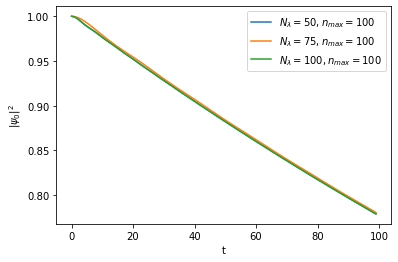

In [63]:
plt.plot(np.abs(aux1[:,0])**2, label=r'$N_\lambda=50, n_{max}=100$')
plt.plot(np.abs(aux2[:,0])**2, label=r'$N_\lambda=75, n_{max}=100$')
plt.plot(np.abs(aux3[:,0])**2, label=r'$N_\lambda=100, n_{max}=100$')
plt.xlabel(r't')
plt.ylabel(r'$|\psi_0|^2$')
plt.legend()
plt.savefig('./figures/fig-decay.png')